In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mlxtend.feature_selection import SequentialFeatureSelector as sf
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [227]:
df=pd.read_csv('healthinsurance.csv')
df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [228]:
df.shape

(15000, 13)

#### The datset has 15000 rows and 13 columns

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


#### Above we can see different Dataypes of the different columns along with the total non null values within each column

In [230]:
df.describe()

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
count,14604.000000,15000.000000,14044.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,0.198133,68.650133,0.777000,0.224133,13401.437620
std,14.015966,13.701935,6.122950,1.228469,0.398606,19.418515,0.416272,0.417024,12148.239619
min,18.000000,34.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.700000,0.000000,0.000000,64.000000,1.000000,0.000000,4846.900000
50%,40.000000,63.000000,29.400000,1.000000,0.000000,71.000000,1.000000,0.000000,9545.650000
75%,52.000000,76.000000,34.400000,2.000000,0.000000,80.000000,1.000000,0.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,1.000000,122.000000,1.000000,1.000000,63770.400000


#### The decribe function shows the mean,min,max,75%,25% values of the data which helps to identify which columns have outliers in them

In [231]:
df.isnull().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

<AxesSubplot:>

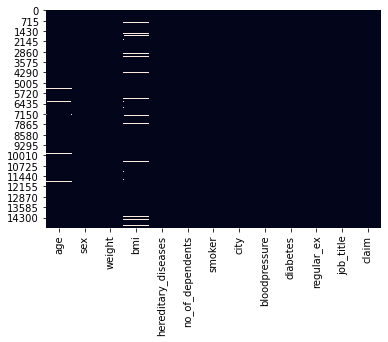

In [232]:
sns.heatmap(df.isnull(),cbar=False)

#### Columns age ,hereditary_diseases have null values in them.Since the amount of missing values of the columns are less than 2% we can drop the null values

In [233]:
df.dropna(subset=['age','bmi'],inplace=True)

#### The null values were dropped

<AxesSubplot:>

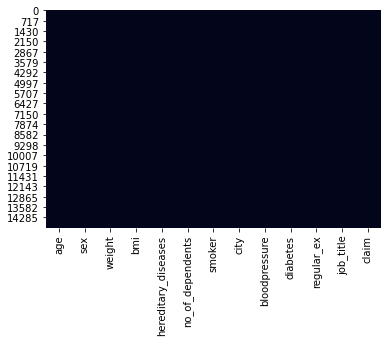

In [234]:
sns.heatmap(df.isnull(),cbar=False)

#### Some columns in the data have a numerical data type when they are supposed to be categorical

In [235]:
df['smoker']=df['smoker'].astype('object')
df['diabetes']=df['diabetes'].astype('object')
df['regular_ex']=df['regular_ex'].astype('object')

In [237]:
df.dtypes

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                  object
city                    object
bloodpressure            int64
diabetes                object
regular_ex              object
job_title               object
claim                  float64
dtype: object

#### The datatypes have been correctly replaced

In [238]:
df_num=df.select_dtypes(np.number)
df_num.head()

,age,weight,bmi,no_of_dependents,bloodpressure,claim
0,60.0,64,24.3,1,72,13112.6
1,49.0,75,22.6,1,78,9567.0
2,32.0,64,17.8,2,88,32734.2
3,61.0,53,36.4,1,72,48517.6
4,19.0,50,20.6,0,82,1731.7


In [131]:
df1=df['age']

<AxesSubplot:xlabel='claim', ylabel='Density'>

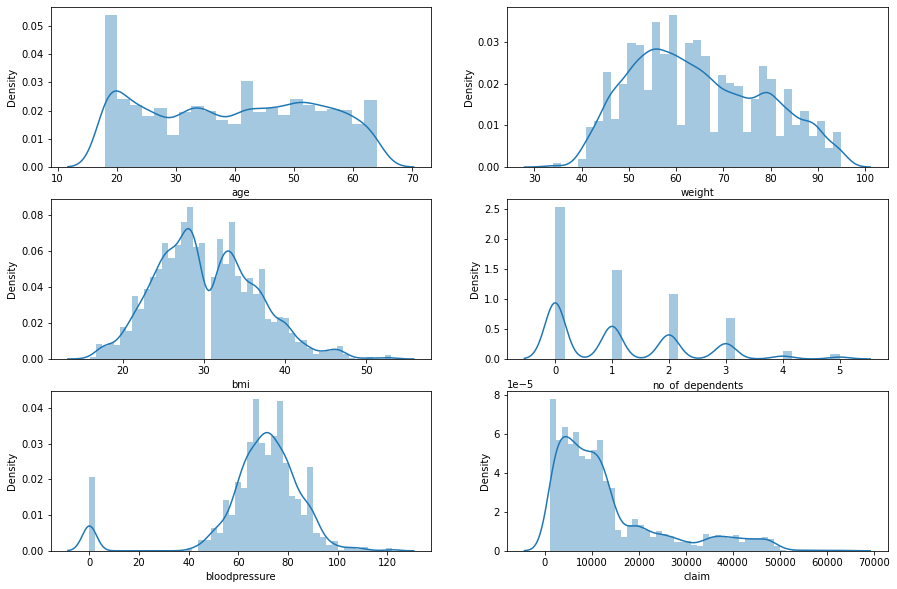

In [239]:

fig,axes=plt.subplots(3,2,figsize=(15,10))
sns.distplot(df['age'], ax=axes[0,0])
sns.distplot(df['weight'], ax=axes[0,1])
sns.distplot(df['bmi'], ax=axes[1,0])
sns.distplot(df['no_of_dependents'], ax=axes[1,1])
sns.distplot(df['bloodpressure'], ax=axes[2,0])
sns.distplot(df['claim'], ax=axes[2,1])

#### As per the above distribution of numerical variables we can identify the skewness of each of them where all of them have a positive skew.

In [133]:
df_num=df.select_dtypes(np.number)

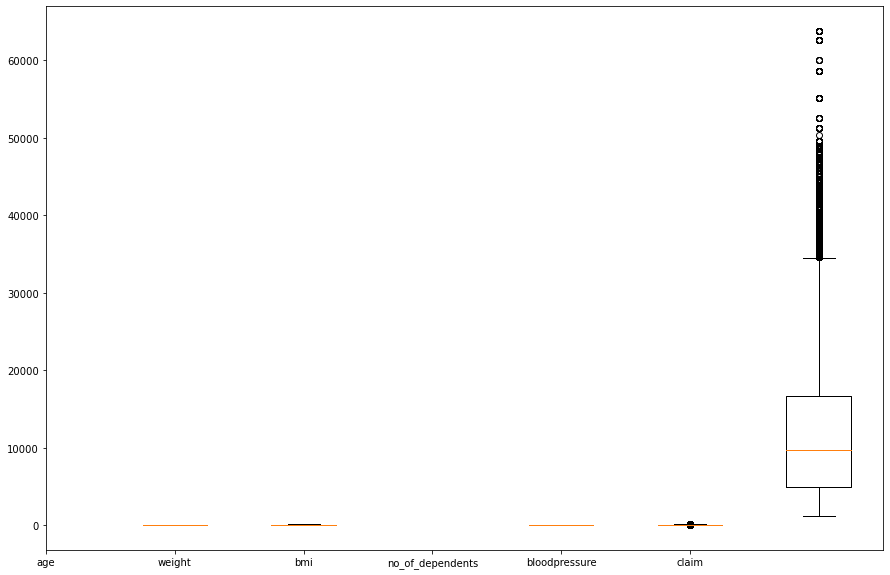

In [134]:

fig,axes=plt.subplots(figsize=(15,10))
plt.boxplot(df_num)
plt.xticks(ticks=np.arange(0,6),labels=df_num.columns)
plt.show()

#### As per the above boxplots the target variable has extreame outliers in them 

#### Treatment of outliers using square root transformation

In [135]:
df_num1=np.log10(df_num+1)

In [136]:
df_num1.head()

,age,weight,bmi,no_of_dependents,bloodpressure,claim
0,1.785330,1.812913,1.403121,0.301030,1.863323,4.117722
1,1.698970,1.880814,1.372912,0.301030,1.897627,3.980821
2,1.518514,1.812913,1.274158,0.477121,1.949390,4.515015
3,1.792392,1.732394,1.572872,0.301030,1.863323,4.685908
4,1.301030,1.707570,1.334454,0.000000,1.919078,3.238723


In [137]:
df_num.head()

,age,weight,bmi,no_of_dependents,bloodpressure,claim
0,60.0,64,24.3,1,72,13112.6
1,49.0,75,22.6,1,78,9567.0
2,32.0,64,17.8,2,88,32734.2
3,61.0,53,36.4,1,72,48517.6
4,19.0,50,20.6,0,82,1731.7


### Z_score method

In [138]:
z_score=(df_num-df_num.mean())/df_num.std()
z_score.head()

,age,weight,bmi,no_of_dependents,bloodpressure,claim
0,1.459227,-0.056531,-0.976143,-0.093468,0.177330,-0.032816
1,0.674408,0.748051,-1.253304,-0.093468,0.485612,-0.323500
2,-0.538495,-0.056531,-2.035876,0.730310,0.999416,1.575849
3,1.530574,-0.861112,0.996590,-0.093468,0.177330,2.869841
4,-1.466008,-1.080544,-1.579376,-0.917245,0.691134,-0.965872


In [139]:
np.where(z_score>3)

(array([   64,   114,   194,   202,   205,   372,   728,   764,   787,
          834,   853,   931,  1181,  1212,  1236,  1237,  1249,  1365,
         1403,  1404,  1435,  1448,  1506,  1548,  1600,  1611,  1615,
         1637,  1736,  1850,  1877,  1897,  2029,  2035,  2039,  2041,
         2073,  2089,  2093,  2114,  2237,  2260,  2272,  2290,  2348,
         2350,  2393,  2526,  2530,  2541,  2551,  2584,  2609,  2673,
         2678,  2683,  2684,  2782,  2833,  2960,  3008,  3072,  3160,
         3187,  3208,  3222,  3371,  3374,  3450,  3463,  3477,  3548,
         3632,  3738,  3767,  4051,  4055,  4109,  4133,  4146,  4267,
         4279,  4285,  4313,  4364,  4441,  4449,  4476,  4542,  4591,
         4683,  4703,  4719,  4735,  4850,  4870,  4878,  4909,  4938,
         4989,  5014,  5020,  5035,  5183,  5184,  5186,  5206,  5233,
         5271,  5321,  5375,  5428,  5464,  5558,  5582,  5617,  5693,
         5694,  5705,  5728,  5854,  5898,  5901,  5967,  5972,  5984,
      

In [250]:
### After Encoding
df_num2 = df_num[(z_score < 3).all(axis=1)] 

In [141]:
## Using IQR
## After encoding
Q1=df_num.quantile(0.25)

Q3=df_num.quantile(0.75)
IQR=Q3-Q1


In [142]:
### Optional 
### df_num[~((df_num<(Q1-(1.5*IQR)))|(df_num>(Q3+(1.5*IQR))).any(axis=1)]

In [143]:
df_cat=df.select_dtypes(np.object)
df_cat.head()

,sex,hereditary_diseases,smoker,city,diabetes,regular_ex,job_title
0,male,NoDisease,0,NewYork,0,0,Actor
1,female,NoDisease,0,Boston,1,1,Engineer
2,female,Epilepsy,1,Phildelphia,1,1,Academician
3,female,NoDisease,1,Pittsburg,1,0,Chef
4,female,NoDisease,0,Buffalo,1,0,HomeMakers


In [144]:
df_cat.describe()

,sex,hereditary_diseases,smoker,city,diabetes,regular_ex,job_title
count,14604,14604,14604,14604,14604,14604,14604
unique,2,10,2,91,2,2,35
top,female,NoDisease,0,Nashville,1,0,Student
freq,7387,13624,11690,296,11361,11316,1298


#### Each of the categories have various classes in them . Also each of the column with its highest value count and its corresponding values can be seen

 #### Exploratory data Analysis using categorical variables

<AxesSubplot:xlabel='sex'>

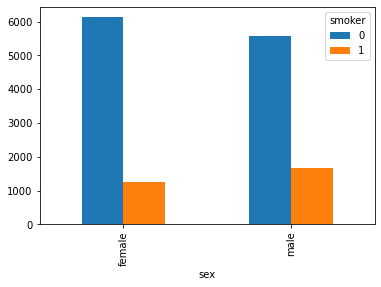

In [145]:
pd.crosstab(df['sex'],df['smoker']).plot(kind='bar')

#### Male gender has the highest number of smokers and female gender has the highest number of non smokers

In [146]:
df_cat1=df_cat.iloc[:,[0,1,3,6]]


## Encoding

In [147]:
df_cat_encoded=df_cat1.apply(LabelEncoder().fit_transform)
df_cat_encoded.head()

,sex,hereditary_diseases,city,job_title
0,1,8,55,2
1,0,8,5,16
2,0,4,63,0
3,0,8,64,10
4,0,8,8,22


In [148]:
df=pd.concat([df_cat_encoded,df_num1],axis=1)
df.head()

,sex,hereditary_diseases,city,job_title,age,weight,bmi,no_of_dependents,bloodpressure,claim
0,1,8,55,2,1.785330,1.812913,1.403121,0.301030,1.863323,4.117722
1,0,8,5,16,1.698970,1.880814,1.372912,0.301030,1.897627,3.980821
2,0,4,63,0,1.518514,1.812913,1.274158,0.477121,1.949390,4.515015
3,0,8,64,10,1.792392,1.732394,1.572872,0.301030,1.863323,4.685908
4,0,8,8,22,1.301030,1.707570,1.334454,0.000000,1.919078,3.238723


In [149]:
z_score=(df-df.mean())/df.std()
z_score.head()

,sex,hereditary_diseases,city,job_title,age,weight,bmi,no_of_dependents,bloodpressure,claim
0,1.011675,0.214917,0.377367,-1.605311,1.257715,0.047114,-0.979530,0.184147,0.238559,0.392287
1,-0.988392,0.214917,-1.551562,-0.260777,0.731639,0.796340,-1.332293,0.184147,0.321252,0.046360
2,-0.988392,-2.966688,0.685995,-1.797387,-0.367640,0.047114,-2.485506,0.908140,0.446031,1.396185
3,-0.988392,0.214917,0.724574,-0.837006,1.300734,-0.841357,1.002759,0.184147,0.238559,1.828005
4,-0.988392,0.214917,-1.435826,0.315451,-1.692481,-1.115266,-1.781394,-1.053528,0.372962,-1.828805


#### Data Frame After removing outliers

In [150]:
df = df[(z_score < 3).all(axis=1)] 
df.head()

,sex,hereditary_diseases,city,job_title,age,weight,bmi,no_of_dependents,bloodpressure,claim
0,1,8,55,2,1.785330,1.812913,1.403121,0.301030,1.863323,4.117722
1,0,8,5,16,1.698970,1.880814,1.372912,0.301030,1.897627,3.980821
2,0,4,63,0,1.518514,1.812913,1.274158,0.477121,1.949390,4.515015
3,0,8,64,10,1.792392,1.732394,1.572872,0.301030,1.863323,4.685908
4,0,8,8,22,1.301030,1.707570,1.334454,0.000000,1.919078,3.238723


<AxesSubplot:>

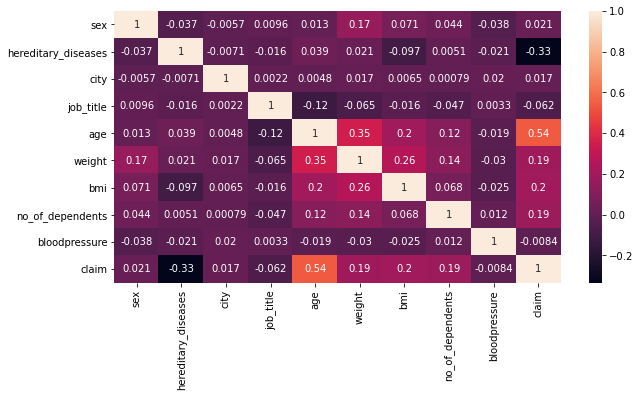

In [151]:

fig,axes=plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

#### The heatmap above shows the correlation between the independent and dependent varibales. The column city has the least correlation and can be exculded

In [152]:
df=df.drop(columns=['city'])

In [153]:
df.head()

,sex,hereditary_diseases,job_title,age,weight,bmi,no_of_dependents,bloodpressure,claim
0,1,8,2,1.785330,1.812913,1.403121,0.301030,1.863323,4.117722
1,0,8,16,1.698970,1.880814,1.372912,0.301030,1.897627,3.980821
2,0,4,0,1.518514,1.812913,1.274158,0.477121,1.949390,4.515015
3,0,8,10,1.792392,1.732394,1.572872,0.301030,1.863323,4.685908
4,0,8,22,1.301030,1.707570,1.334454,0.000000,1.919078,3.238723


#### Train Test Split

In [154]:
X=df.iloc[:,:8].values
y=df.iloc[:,[8]].values

In [155]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [156]:
lin_reg1=LinearRegression()
lin_reg1.fit(X_train,y_train)

LinearRegression()

In [157]:
y_pred_train=lin_reg1.predict(X_train)

In [158]:
y_pred=lin_reg1.predict(X_test)

In [159]:
lin_reg1.score(X_train,y_train)

0.43385001203838114

In [160]:
lin_reg1.score(X_test,y_test)

0.4408936029605496

In [161]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
np.sqrt(mse)

0.29538106087796284

In [162]:
mse=mean_squared_error(y_train,y_pred_train)
rmse=np.sqrt(mse)
np.sqrt(mse)

0.2968850625864113

#### OLS

In [163]:
X=df.iloc[:,:8]
y=df.iloc[:,[8]]
X=sm.add_constant(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
MLR_model=sm.OLS(y_train,X_train).fit()
MLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     914.2
Date:                Tue, 16 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:55:35   Log-Likelihood:                -1953.9
No. Observations:                9553   AIC:                             3926.
Df Residuals:                    9544   BIC:                             3990.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.4854      0.078     31.722      0.000       2.332       2.639
sex                    -0.0069      0.006     -1.111      0.267      -0.019       0.005
hereditary_diseases    -0.1107      0.002    -45.543      0.000      -0.115      -0.106
job_title               0.0001      0.000      0.485      0.628      -0.000       0.001
age                     1.2704      0.020     63.175      0.000       1.231       1.310
weight                 -0.0622      0.037     -1.672      0.095      -0.135       0.011
bmi                     0.2651      0.038      7.068      0.000       0.192       0.339
no_of_dependents        0.2169      0.013     17.052      0.000       0.192       0.242
bloodpressure          -0.0061      0.007     -0.833      0.405      -0.021       0.008
==============================================================================
Omnibus:                     1890.543   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3225.055
Skew:                           1.332   Prob(JB):                         0.00
Kurtosis:                       4.005   Cond. No.                         627.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
df

,sex,hereditary_diseases,job_title,age,weight,bmi,no_of_dependents,bloodpressure,claim
0,1,8,2,1.785330,1.812913,1.403121,0.301030,1.863323,4.117722
1,0,8,16,1.698970,1.880814,1.372912,0.301030,1.897627,3.980821
2,0,4,0,1.518514,1.812913,1.274158,0.477121,1.949390,4.515015
3,0,8,10,1.792392,1.732394,1.572872,0.301030,1.863323,4.685908
4,0,8,22,1.301030,1.707570,1.334454,0.000000,1.919078,3.238723
...,...,...,...,...,...,...,...,...,...
14995,1,8,20,1.602060,1.698970,1.466868,0.301030,1.740363,4.323937
14996,1,8,33,1.602060,1.875061,1.485721,0.698970,1.812913,3.875831
14997,1,8,18,1.322219,1.799341,1.535294,0.000000,1.724276,3.143795
14998,1,8,17,1.724276,1.949390,1.576341,0.000000,1.851258,3.961212


In [165]:
df_n=df.iloc[:,3:8]
df_n.head()

,age,weight,bmi,no_of_dependents,bloodpressure
0,1.785330,1.812913,1.403121,0.301030,1.863323
1,1.698970,1.880814,1.372912,0.301030,1.897627
2,1.518514,1.812913,1.274158,0.477121,1.949390
3,1.792392,1.732394,1.572872,0.301030,1.863323
4,1.301030,1.707570,1.334454,0.000000,1.919078


### Variance Inflation factor to find variables supporting multi-collinearity

In [166]:
for ind in range(len(df_n.columns)):
    vif=pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(df_n.values, i) for i in range(df_n.shape[1])]
    vif['Features']=df_n.columns
    vif
    multi_col=vif[vif['VIF_Factor']>20]
    if multi_col.empty==False:
        df_sort=multi_col.sort_values(by=['VIF_Factor'],ascending=False)
    else:
        print(vif)
        break

    if df_sort.empty==False:
        df_n =df_n.drop(df_sort.Features.iloc[0],axis=1)
    else:
        print(vif)

   VIF_Factor          Features
0   16.961844               age
1    2.137096  no_of_dependents
2   15.911333     bloodpressure


In [167]:
df_n.head()

,age,no_of_dependents,bloodpressure
0,1.785330,0.301030,1.863323
1,1.698970,0.301030,1.897627
2,1.518514,0.477121,1.949390
3,1.792392,0.301030,1.863323
4,1.301030,0.000000,1.919078


#### Building model after removing variables with high inflation factor

In [168]:
df_sig=pd.concat([df.iloc[:,0:3],df_n,df.iloc[:,[8]]],axis=1)
df_sig.head()

,sex,hereditary_diseases,job_title,age,no_of_dependents,bloodpressure,claim
0,1,8,2,1.785330,0.301030,1.863323,4.117722
1,0,8,16,1.698970,0.301030,1.897627,3.980821
2,0,4,0,1.518514,0.477121,1.949390,4.515015
3,0,8,10,1.792392,0.301030,1.863323,4.685908
4,0,8,22,1.301030,0.000000,1.919078,3.238723


In [206]:
X=df_sig.iloc[:,:6].values
y=df_sig.iloc[:,[6]].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [207]:
lin_reg2=LinearRegression()
lin_reg2.fit(X_train,y_train)

LinearRegression()

In [171]:
lin_reg2.score(X_train,y_train)

0.43088176192789496

In [172]:
y_pred_train=lin_reg2.predict(X_train)

In [173]:
y_pred_test=lin_reg2.predict(X_test)

In [174]:
lin_reg2.score(X_test,y_test)

0.43752955695427687

In [175]:
mse=mean_squared_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
np.sqrt(mse)

0.29626835645362337

In [176]:
mse=mean_squared_error(y_train,y_pred_train)
rmse=np.sqrt(mse)
np.sqrt(mse)

0.29766230988337655

In [177]:
X=df_sig.iloc[:,:6]
X=sm.add_constant(X)
y=df_sig.iloc[:,[6]]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [178]:
MLR_model2=sm.OLS(y_train,X_train).fit()
MLR_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     1205.
Date:                Tue, 16 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:55:36   Log-Likelihood:                -1978.8
No. Observations:                9553   AIC:                             3972.
Df Residuals:                    9546   BIC:                             4022.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.7579      0.038     71.960      0.000       2.683       2.833
sex                    -0.0058      0.006     -0.954      0.340      -0.018       0.006
hereditary_diseases    -0.1125      0.002    -46.423      0.000      -0.117      -0.108
job_title               0.0002      0.000      0.586      0.558      -0.000       0.001
age                     1.2849      0.019     68.012      0.000       1.248       1.322
no_of_dependents        0.2191      0.013     17.269      0.000       0.194       0.244
bloodpressure          -0.0069      0.007     -0.939      0.348      -0.021       0.008
==============================================================================
Omnibus:                     1999.278   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3524.070
Skew:                           1.374   Prob(JB):                         0.00
Kurtosis:                       4.139   Cond. No.                         307.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The R2 and adjusted R2 are the same
#### Durbin-Watson:	1.998 means no auto correlation
#### Cond. No.	307. means Moderate Multi collinearity


#### Choosing variables with good correlation with the dependent variable

<AxesSubplot:>

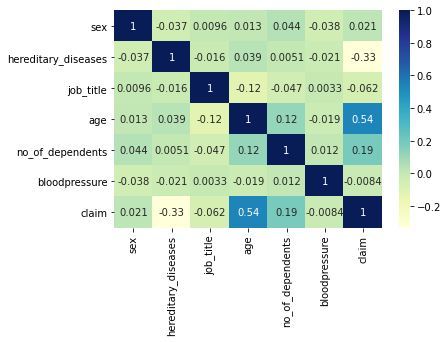

In [179]:
sns.heatmap(df_sig.corr(),cmap="YlGnBu",annot=True)

#### Dropping columns sex,job_title,blood_pressure

In [180]:
df_corr=df_sig.drop(columns=['sex','job_title','bloodpressure'])

In [181]:
df_corr.head()

,hereditary_diseases,age,no_of_dependents,claim
0,8,1.785330,0.301030,4.117722
1,8,1.698970,0.301030,3.980821
2,4,1.518514,0.477121,4.515015
3,8,1.792392,0.301030,4.685908
4,8,1.301030,0.000000,3.238723


In [182]:
X=df_corr.iloc[:,:3].values
y=df_corr.iloc[:,[3]].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [183]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [184]:
lin_reg.score(X_train,y_train)

0.43075947876339915

In [185]:
lin_reg.score(X_test,y_test)

0.43752473195266106

In [186]:
y_pred_train=lin_reg.predict(X_train)
y_pred_test=lin_reg.predict(X_test)
mse=mean_squared_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
np.sqrt(mse)

0.2962696271801572

In [187]:
mse=mean_squared_error(y_train,y_pred_train)
rmse=np.sqrt(mse)
np.sqrt(mse)

0.297694286660576

#### Feature Selection using Forward Selection

In [188]:
df.head()

,sex,hereditary_diseases,job_title,age,weight,bmi,no_of_dependents,bloodpressure,claim
0,1,8,2,1.785330,1.812913,1.403121,0.301030,1.863323,4.117722
1,0,8,16,1.698970,1.880814,1.372912,0.301030,1.897627,3.980821
2,0,4,0,1.518514,1.812913,1.274158,0.477121,1.949390,4.515015
3,0,8,10,1.792392,1.732394,1.572872,0.301030,1.863323,4.685908
4,0,8,22,1.301030,1.707570,1.334454,0.000000,1.919078,3.238723


In [189]:
X=df.iloc[:,:8]
y=df.iloc[:,[8]]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
lin_reg3=LinearRegression()

In [190]:
lin_reg_forward=sf(estimator=lin_reg3,
    k_features='best',
    forward=True,
    
    verbose=2,
    scoring='r2')
sfs_forward=lin_reg_forward.fit(X_train,y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2021-03-16 17:55:37] Features: 1/8 -- score: 0.28310425360561037[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2021-03-16 17:55:37] Features: 2/8 -- score: 0.41154330431339226[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2021-03-16 17:55:37] Features: 3/8 -- score: 0.4290936892732929[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [191]:
print(sfs_forward.k_feature_names_)
print(sfs_forward.k_score_)

('hereditary_diseases', 'age', 'weight', 'bmi', 'no_of_dependents')
0.4319219325212618


#### Modelling after Feature Selection

In [210]:
X=df.loc[:,['hereditary_diseases', 'age', 'weight', 'bmi', 'no_of_dependents']].values

In [211]:
y=df.iloc[:,[8]].values

In [212]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
lin_reg4=LinearRegression()

In [213]:
lin_reg4.fit(X_train,y_train)
y_pred_train=lin_reg4.predict(X_train)
y_pred_test=lin_reg4.predict(X_test)
print('Train data score:',lin_reg4.score(X_train,y_train))
print('Test data score:',lin_reg4.score(X_test,y_test))
mse_test=mean_squared_error(y_test,y_pred_test)
rmse_test=np.sqrt(mse_test)
print("RMSE of test data:",np.sqrt(mse_test))
mse_train=mean_squared_error(y_train,y_pred_train)
rmse_train=np.sqrt(mse_train)
print("RMSE of train data",np.sqrt(mse_train))

Train data score: 0.4337264056663872
Test data score: 0.44095198268585767
RMSE of test data: 0.2953656392020037
RMSE of train data 0.2969174699727006


In [196]:
X=df.iloc[:,:8]
y=df.iloc[:,[8]]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
lin_reg=LinearRegression()
lin_reg_back=sf(estimator=lin_reg,
    k_features='best',
    forward=False,
    
    verbose=2,
    scoring='r2')
sfs_back=lin_reg_back.fit(X_train,y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2021-03-16 17:55:37] Features: 7/1 -- score: 0.4317390064371244[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2021-03-16 17:55:38] Features: 6/1 -- score: 0.43184502409253334[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished

[2021-03-16 17:55:38] Features: 5/1 -- score: 0.4319219325212618[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [197]:
print(sfs_back.k_feature_names_)
print(sfs_back.k_score_)

('hereditary_diseases', 'age', 'weight', 'bmi', 'no_of_dependents')
0.4319219325212618


#### Recurssive Feature ELImination

In [198]:
X=df.iloc[:,:8]
y=df.iloc[:,[8]]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
lin_reg=LinearRegression()
rfe_model=RFE(estimator=lin_reg, n_features_to_select=5)
rfe_model=rfe_model.fit(X_train,y_train)
feat_index=pd.Series(data=rfe_model.ranking_,index=X_train.columns)
sig_feat=feat_index[feat_index==1]
sig_feat

hereditary_diseases    1
age                    1
weight                 1
bmi                    1
no_of_dependents       1
dtype: int32

In [199]:
def get_train_rmse(model):
    train_pred=model.predict(X_train)
    mse=mean_squared_error(y_train,train_pred)
    rmse=np.sqrt(mse)
    return rmse

In [200]:
def get_test_rmse(model):
    test_pred=model.predict(X_test)
    mse=mean_squared_error(y_test,test_pred)
    rmse=np.sqrt(mse)
    return rmse

In [201]:
def train_score(model):
    r2=model.score(X_train,y_train)
    return r2

In [202]:
def test_score(model):
    r2=model.score(X_test,y_test)
    return r2

In [203]:
score_card=pd.DataFrame(columns=['Model','Train Rmse','Test Rmse','Alpha','Train Score','Test Score'])
def update_score_card(algorithm_name,model,alpha='-'):
    global score_card
    
    score_card=score_card.append({'Model':algorithm_name,'Train Rmse':get_train_rmse(model),
                      'Test Rmse':get_test_rmse(model),'Alpha':alpha,'Train Score':train_score(model),
                      'Test Score':test_score(model)},ignore_index=True)
    return score_card

In [204]:
update_score_card("Base Model",lin_reg1)

,Model,Train Rmse,Test Rmse,Alpha,Train Score,Test Score
0,Base Model,0.296885,0.295381,-,0.43385,0.440894


In [208]:
update_score_card("Model with VIF<20",lin_reg2)

,Model,Train Rmse,Test Rmse,Alpha,Train Score,Test Score
0,Base Model,0.296885,0.295381,-,0.433850,0.440894
1,Model with VIF<20,0.297662,0.296268,-,0.430882,0.437530


In [214]:
update_score_card("Model after feature selection" ,lin_reg4)

,Model,Train Rmse,Test Rmse,Alpha,Train Score,Test Score
0,Base Model,0.296885,0.295381,-,0.433850,0.440894
1,Model with VIF<20,0.297662,0.296268,-,0.430882,0.437530
2,Model after feature selection,0.296917,0.295366,-,0.433726,0.440952


#### Cross Validation

In [215]:
scores=cross_val_score(estimator=rfe_model,
    X=X_train,
    y=y_train,
    scoring='r2',
    cv=5)

In [216]:
print(scores)
print(min(scores))
print(max(scores))
print(np.mean(scores))

[0.46864147 0.41907577 0.39269776 0.43673552 0.44245915]
0.3926977554508855
0.46864147176805493
0.4319219325212618


#### Gradient Descent

In [217]:
X=df.loc[:,['hereditary_diseases', 'age', 'weight', 'bmi', 'no_of_dependents']].values
y=df.iloc[:,[8]].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
sgd=SGDRegressor()
sgd.fit(X_train,y_train)

SGDRegressor()

In [218]:
update_score_card("SGD Regressor",sgd)

,Model,Train Rmse,Test Rmse,Alpha,Train Score,Test Score
0,Base Model,0.296885,0.295381,-,0.433850,0.440894
1,Model with VIF<20,0.297662,0.296268,-,0.430882,0.437530
2,Model after feature selection,0.296917,0.295366,-,0.433726,0.440952
3,SGD Regressor,0.313524,0.313629,-,0.368612,0.369677


#### Regularization

In [219]:
ridge=Ridge(alpha=1, max_iter=500)
ridge.fit(X_train,y_train)

Ridge(alpha=1, max_iter=500)

In [220]:
update_score_card("Ridge Regression",ridge)

,Model,Train Rmse,Test Rmse,Alpha,Train Score,Test Score
0,Base Model,0.296885,0.295381,-,0.433850,0.440894
1,Model with VIF<20,0.297662,0.296268,-,0.430882,0.437530
2,Model after feature selection,0.296917,0.295366,-,0.433726,0.440952
3,SGD Regressor,0.313524,0.313629,-,0.368612,0.369677
4,Ridge Regression,0.296919,0.295387,-,0.433721,0.440870


In [221]:
lasso=Lasso(alpha=1, max_iter=500)
lasso.fit(X_train,y_train)

Lasso(alpha=1, max_iter=500)

In [222]:
update_score_card("Lasso Regression",lasso)

,Model,Train Rmse,Test Rmse,Alpha,Train Score,Test Score
0,Base Model,0.296885,0.295381,-,0.433850,0.440894
1,Model with VIF<20,0.297662,0.296268,-,0.430882,0.437530
2,Model after feature selection,0.296917,0.295366,-,0.433726,0.440952
3,SGD Regressor,0.313524,0.313629,-,0.368612,0.369677
4,Ridge Regression,0.296919,0.295387,-,0.433721,0.440870
5,Lasso Regression,0.394569,0.395130,-,0.000000,-0.000480


### Grid Search

In [223]:
tuned_param=[{'alpha':[0.00001,0.00001,0.0001,0.001,0.01,0.1,1,5,10,15,20,25,30,35,40,45,50]}]
ridge=Ridge()
ridge_grid=GridSearchCV( estimator=ridge,
    param_grid=tuned_param,cv=5)
ridge_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [1e-05, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                    5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}])

In [224]:
update_score_card("Ridge Regression Using Grid Search",ridge_grid,ridge_grid.best_params_)

,Model,Train Rmse,Test Rmse,Alpha,Train Score,Test Score
0,Base Model,0.296885,0.295381,-,0.433850,0.440894
1,Model with VIF<20,0.297662,0.296268,-,0.430882,0.437530
2,Model after feature selection,0.296917,0.295366,-,0.433726,0.440952
3,SGD Regressor,0.313524,0.313629,-,0.368612,0.369677
4,Ridge Regression,0.296919,0.295387,-,0.433721,0.440870
5,Lasso Regression,0.394569,0.395130,-,0.000000,-0.000480
6,Ridge Regression Using Grid Search,0.296917,0.295368,{'alpha': 0.1},0.433726,0.440944


In [249]:
score_card
score_card.style.highlight_min(subset=['Test Rmse'],
    color = 'lightgreen')

,Model,Train Rmse,Test Rmse,Alpha,Train Score,Test Score
0,Base Model,0.296885,0.295381,-,0.433850,0.440894
1,Model with VIF<20,0.297662,0.296268,-,0.430882,0.437530
2,Model after feature selection,0.296917,0.295366,-,0.433726,0.440952
3,SGD Regressor,0.313524,0.313629,-,0.368612,0.369677
4,Ridge Regression,0.296919,0.295387,-,0.433721,0.440870
5,Lasso Regression,0.394569,0.395130,-,0.000000,-0.000480
6,Ridge Regression Using Grid Search,0.296917,0.295368,{'alpha': 0.1},0.433726,0.440944


###### Overall score of the model on train data is 43%  and rmse of 0.296 and on test data it is 44% and rmse as 0.295 as seen in the above score card.With the rmse being significantly low we can conclude that the Ridge Regression Using Grid Search model would be the best choice 

##### There has been a slight but constant decrease in rmse value of both train and test data with each improvement on the model

##### The accuracy of the model is not  high enough, high bias could be the reason for this which means the predicted value is not close enough  to the actual value.This problem arises on both test and train data since both give a low score and so the possibility of overfitting is low 